# Assignment 3: Feature Detection and Dsscription

## Set Up

In [30]:
%matplotlib inline
%matplotlib notebook
%load_ext autoreload
%autoreload 2
import cv2
import numpy as np
import matplotlib.pyplot as plt
from a3utils import *
from sift import get_features
from harris import get_interest_points
from sklearn.neighbors import KDTree
from IPython.core.debugger import set_trace

# Notre Dame
# image = load_image('../data/Notre Dame/921919841_a30df938f2_o.jpg')
# eval_file = '../data/Notre Dame/921919841_a30df938f2_o_to_4191453057_c86028ce1f_o.pkl'

# # Mount Rushmore 
# image = load_image('../data/Mount Rushmore/9021235130_7c2acd9554_o.jpg')
# eval_file = '../data/Mount Rushmore/9021235130_7c2acd9554_o_to_9318872612_a255c874fb_o.pkl'

# # Episcopal Gaudi 
# image = load_image('../data/Episcopal Gaudi/4386465943_8cf9776378_o.jpg')
# eval_file = '../data/Episcopal Gaudi/4386465943_8cf9776378_o_to_3743214471_1b5bbfda98_o.pkl'

# image = load_image('../data/Test/box.jpg')

# scale_factor = 0.5
# image = cv2.resize(image, (0, 0), fx=scale_factor, fy=scale_factor)
# image_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

feature_width = 16 # width and height of each local feature, in pixels. 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Find distinctive points in each image (Szeliski 4.1.1)

### Notre Dame

In [27]:
image = load_image('../data/Notre Dame/921919841_a30df938f2_o.jpg')
eval_file = '../data/Notre Dame/921919841_a30df938f2_o_to_4191453057_c86028ce1f_o.pkl'

scale_factor = 0.5
image = cv2.resize(image, (0, 0), fx=scale_factor, fy=scale_factor)
image_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

<IPython.core.display.Javascript object>


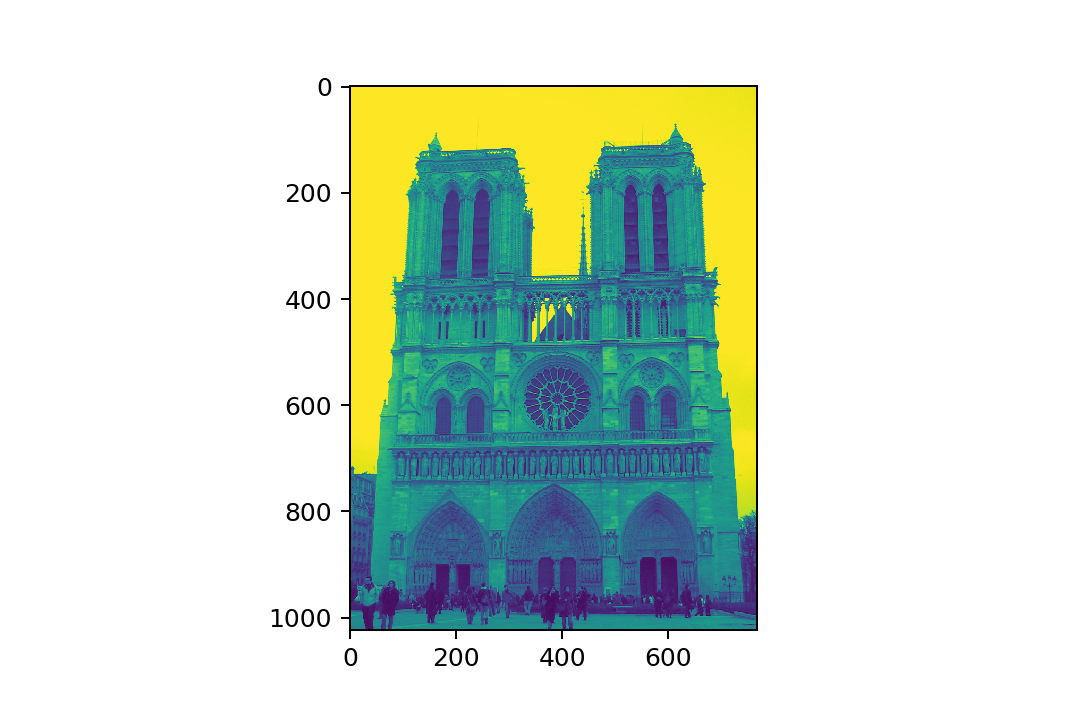

<IPython.core.display.Javascript object>


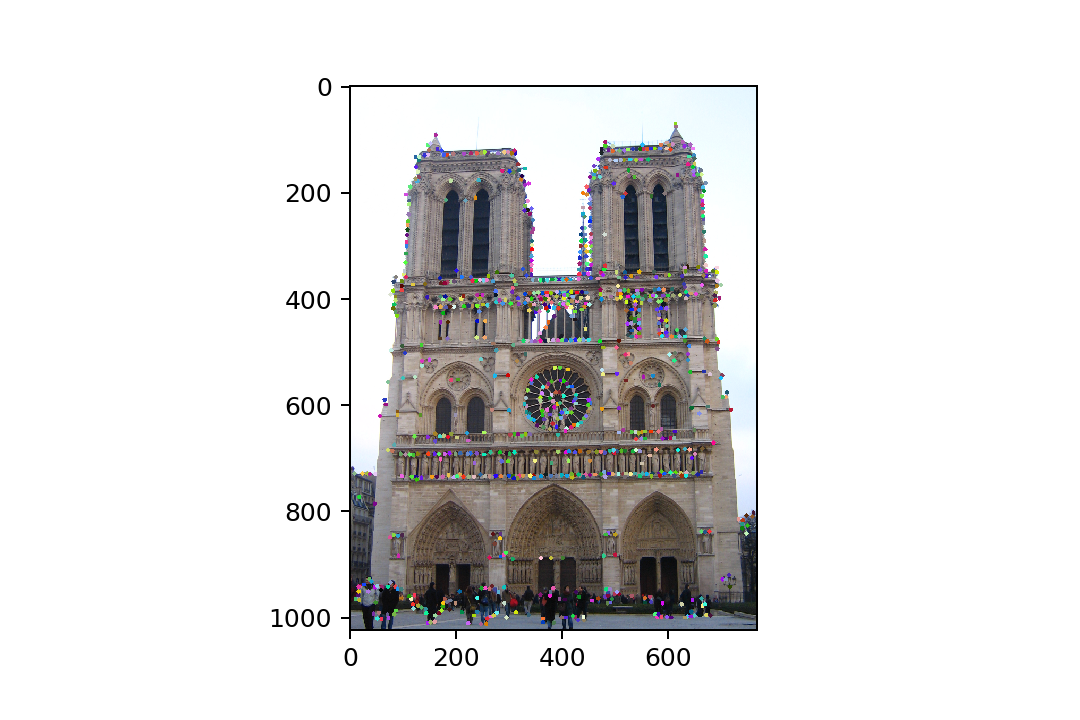

1000 corners in image


In [28]:
# x, y, _, scales, _ = get_interest_points(image_bw, feature_width)
#x, y = cheat_interest_points(eval_file, scale_factor)

x, y = get_interest_points(image_bw, feature_width)
plt.figure(); plt.imshow(image_bw)

# Visualize the interest points
c = show_interest_points(image, x, y)
plt.figure(); plt.imshow(c)
print('{:d} corners in image'.format(len(x)))

### Mount Rushmore 

In [5]:
image = load_image('../data/Mount Rushmore/9021235130_7c2acd9554_o.jpg')
eval_file = '../data/Mount Rushmore/9021235130_7c2acd9554_o_to_9318872612_a255c874fb_o.pkl'

scale_factor = 0.5
image = cv2.resize(image, (0, 0), fx=scale_factor, fy=scale_factor)
image_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

<IPython.core.display.Javascript object>


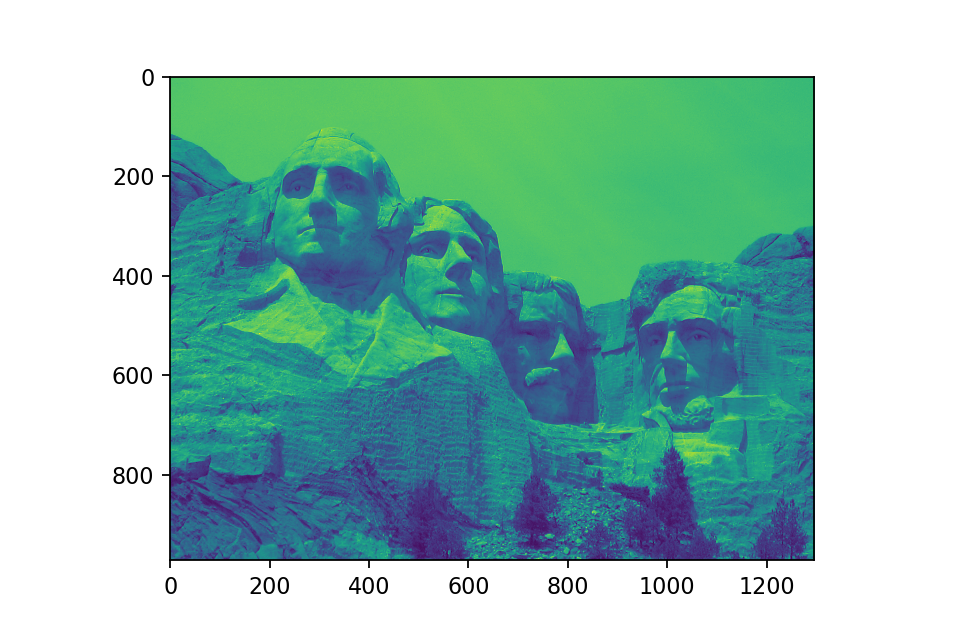

<IPython.core.display.Javascript object>


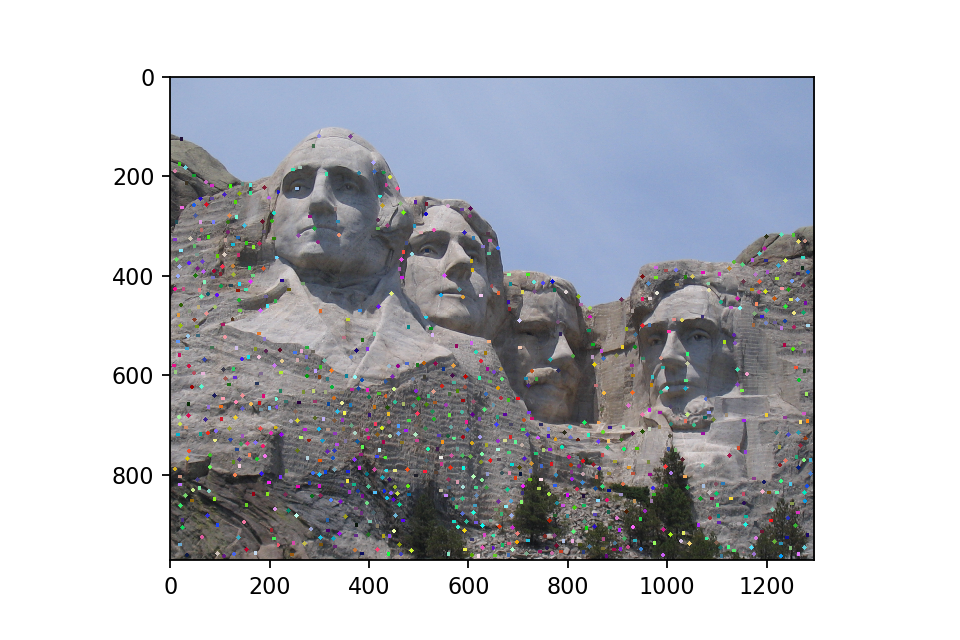

1000 corners in image


In [6]:
x, y = get_interest_points(image_bw, feature_width)
plt.figure(); plt.imshow(image_bw)

# Visualize the interest points
c = show_interest_points(image, x, y)
plt.figure(); plt.imshow(c)
print('{:d} corners in image'.format(len(x)))

### Episcopal Gaudi 

In [7]:
image = load_image('../data/Episcopal Gaudi/4386465943_8cf9776378_o.jpg')
eval_file = '../data/Episcopal Gaudi/4386465943_8cf9776378_o_to_3743214471_1b5bbfda98_o.pkl'

scale_factor = 0.5
image = cv2.resize(image, (0, 0), fx=scale_factor, fy=scale_factor)
image_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

<IPython.core.display.Javascript object>


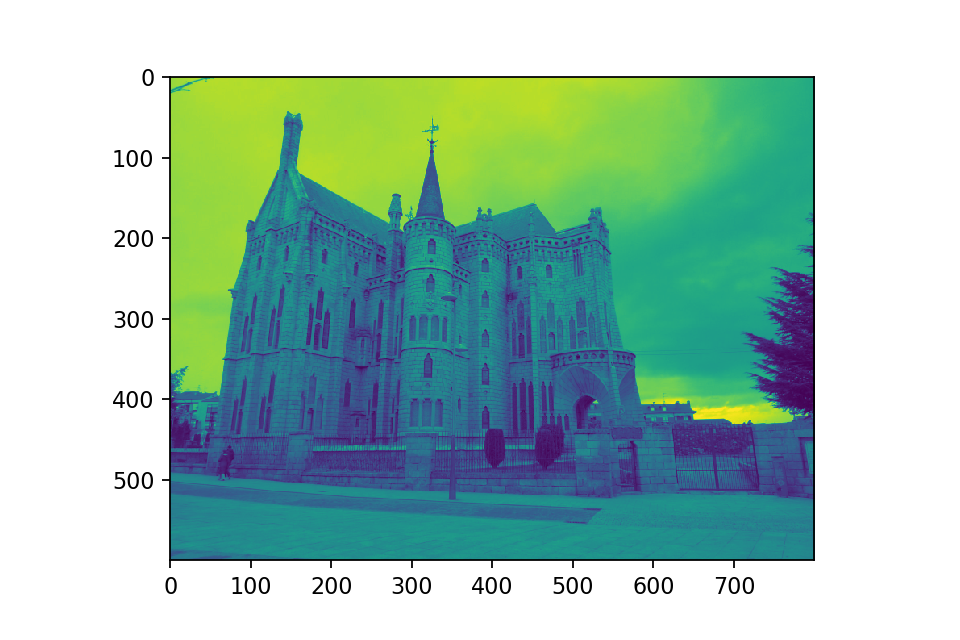

<IPython.core.display.Javascript object>


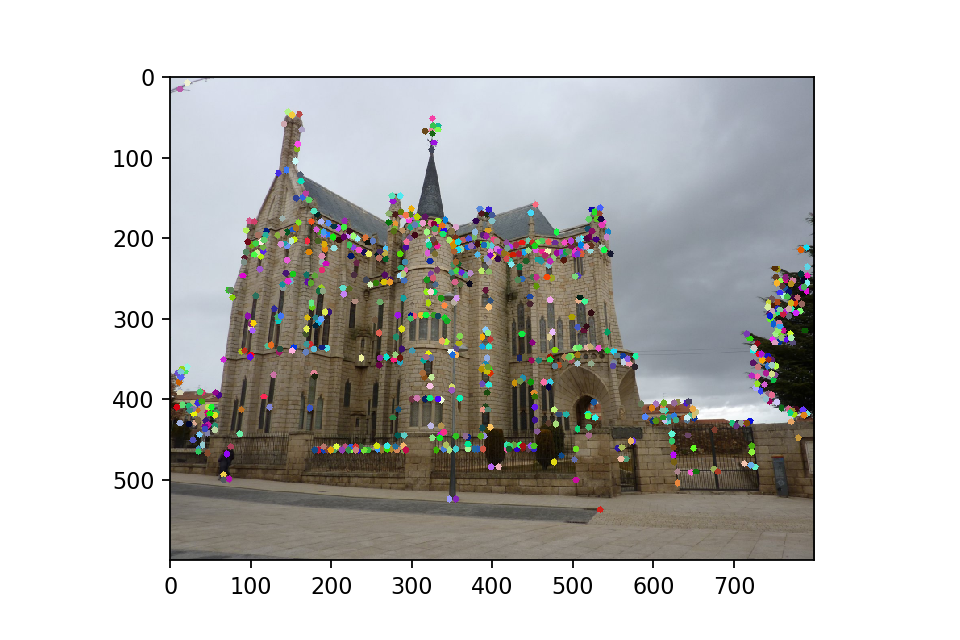

849 corners in image


In [8]:
x, y = get_interest_points(image_bw, feature_width)
plt.figure(); plt.imshow(image_bw)

# Visualize the interest points
c = show_interest_points(image, x, y)
plt.figure(); plt.imshow(c)
print('{:d} corners in image'.format(len(x)))

### Box

In [9]:
image = load_image('../data/Test/box.jpg')

scale_factor = 0.5
image = cv2.resize(image, (0, 0), fx=scale_factor, fy=scale_factor)
image_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

<IPython.core.display.Javascript object>


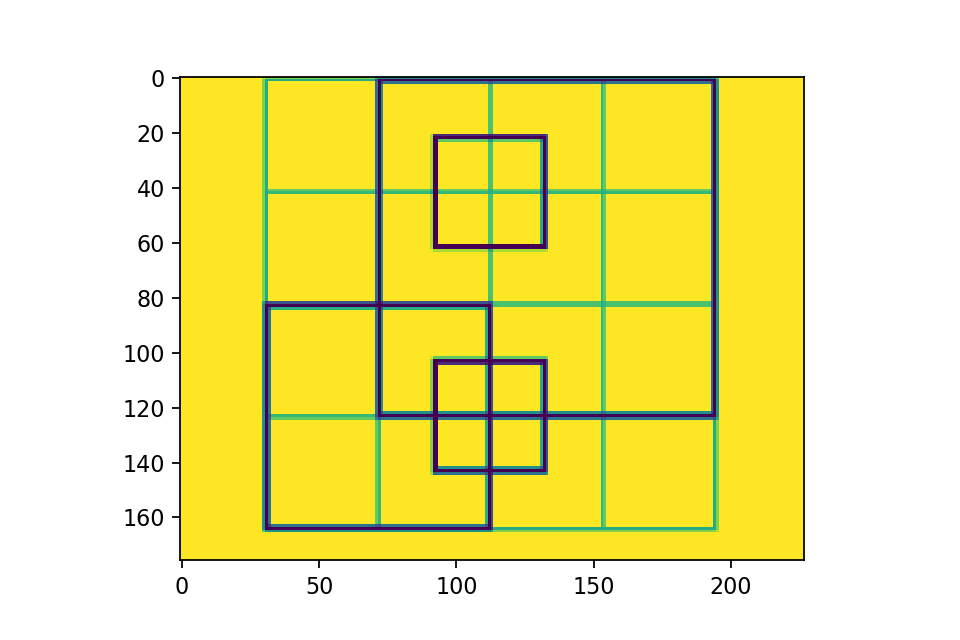

<IPython.core.display.Javascript object>


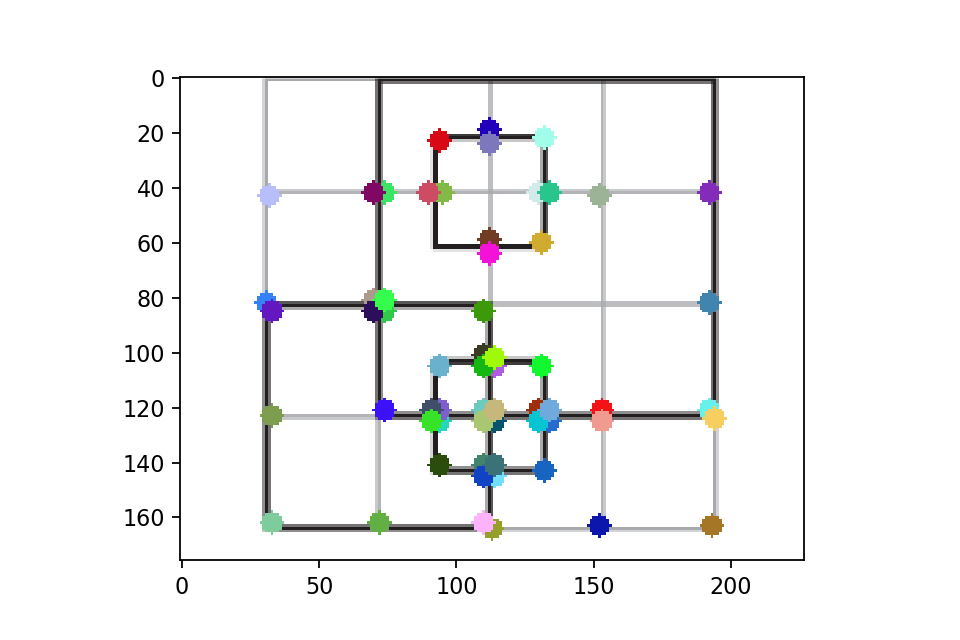

60 corners in image


In [10]:
x, y = get_interest_points(image_bw, feature_width)
plt.figure(); plt.imshow(image_bw)

# Visualize the interest points
c = show_interest_points(image, x, y)
plt.figure(); plt.imshow(c)
print('{:d} corners in image'.format(len(x)))

## Create feature vectors at each interest point (Szeliski 4.1.2)

In [31]:
image_features = get_features(image_bw, x, y, feature_width = 16)

# Rough

Merging Images based on key points

In [13]:
image1 = load_image('../data/Test/left.jpg')

scale_factor = 0.5
image1 = cv2.resize(image1, (0, 0), fx=scale_factor, fy=scale_factor)
image_bw1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

image2 = load_image('../data/Test/right.jpg')

scale_factor = 0.5
image2 = cv2.resize(image2, (0, 0), fx=scale_factor, fy=scale_factor)
image_bw2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

feature_widthre_width = 16

<IPython.core.display.Javascript object>


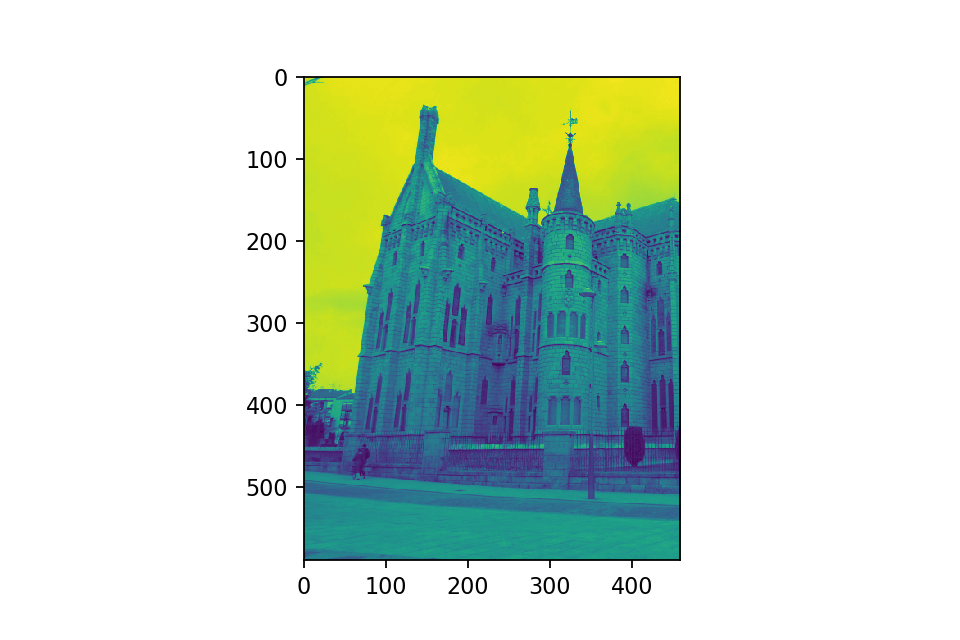

In [14]:
plt.imshow(image_bw1)

<IPython.core.display.Javascript object>


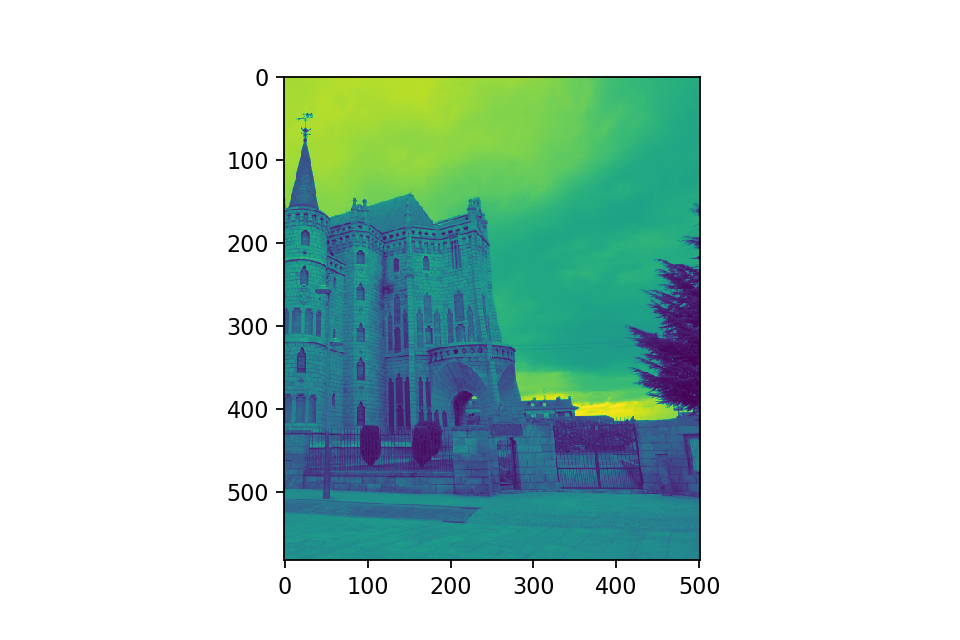

In [15]:
plt.imshow(image_bw2)

### Finding feature for each image

In [17]:
x1, y1 = get_interest_points(image_bw1, feature_width)
x2, y2 = get_interest_points(image_bw2, feature_width)

image_features1 = get_features(image_bw1, x1, y1, feature_width = 16)
image_features2 = get_features(image_bw2, x2, y2, feature_width = 16)

### Finding similar feature

In [18]:
tree = KDTree(image_features2)
val, index = tree.query(image_features1)

In [19]:
paired_feature = []
for i in range(len(image_features1)):
    j = index[i].tolist()[0]
    paired_feature.append(list(((x1[i], y1[i]), (x2[j], y2[j]))))

In [20]:
threshold = 0.04

In [21]:
best_pair = []
for i in range(len(paired_feature)):
    if val[i] < threshold:
        best_pair.append(paired_feature[i])

In [22]:
left_side = min(list(best_pair[i][0][0] for i in range(len(best_pair))))
right_side = max(list(best_pair[i][1][0] for i in range(len(best_pair))))

### Merging images based on features

In [23]:
new_image = np.append(image_bw1[7:,:], image_bw2[:, right_side:], axis = 1)

<IPython.core.display.Javascript object>


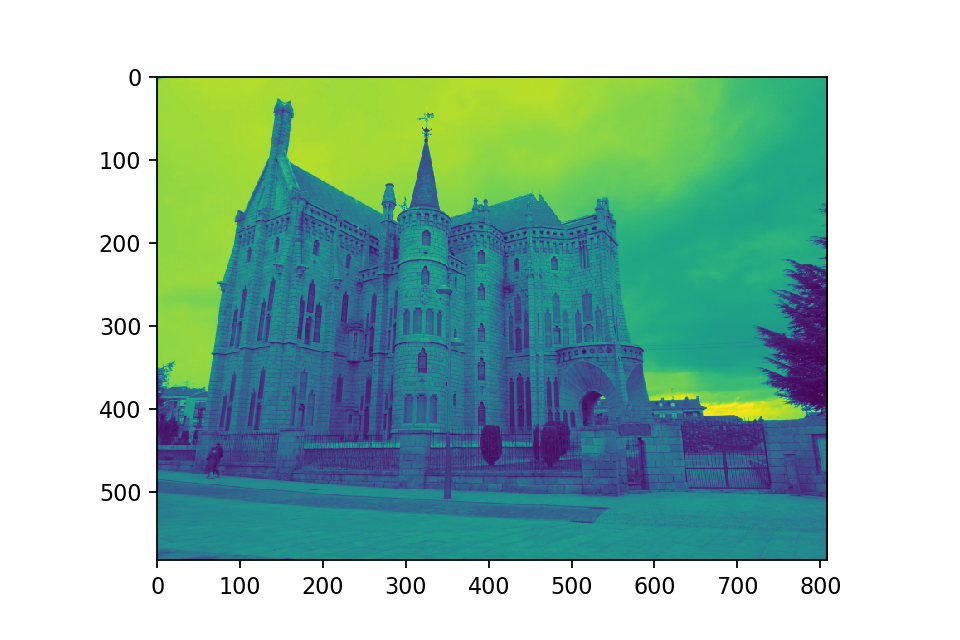

In [24]:
plt.imshow(new_image)